In [1]:
import pandas as pd 
import numpy as np 
import pingouin as pg 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read in the metric files saved as csv
controls = pd.read_csv('../../DerivedData/extracted_diffusion_metrics_control_group_mergedLR.csv', index_col=0)
preterms = pd.read_csv('../../DerivedData/extracted_diffusion_metrics_preterm_group_mergedLR.csv', index_col=0)

### first get all regions pairs, metrics to be evaluated 
tract_names = np.unique(np.array([tract.split('_')[0] for tract in controls.columns[2:]]))
print('Number of evaluated bundles: {}'.format(len(tract_names)))
metrics = np.unique(np.array([tract.partition('_')[-1] for tract in controls.columns[2:]]))

### get matching + extreme/moderate grouping 
extreme_and_match = pd.read_csv('../../DerivedData/extreme_pairs_mean_diffusion_metrics_over_WM.csv', index_col=0)[['preterm_ID', 'matched_ID']]
moderate_and_match = pd.read_csv('../../DerivedData/moderate_pairs_mean_diffusion_metrics_over_WM.csv', index_col=0)[['preterm_ID', 'matched_ID']]
    
    
### significance_results 
res_comp = pd.read_csv('extreme_vs_control_per_tract_new.csv', header=1)

Number of evaluated bundles: 15


/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/volatile/miniconda3/envs/ohbm/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [3]:
def get_notation(sig_results,pair_names,metric):
    notation = []
    for pair in pair_names:
        
        if sig_results[sig_results['metric'] == pair][metric].values[0] <= 0.0001:
            notation.append('****')
            
        elif 0.0001 < sig_results[sig_results['metric'] == pair][metric].values[0] <= 0.001:
            notation.append('***')
            
        elif 0.001 < sig_results[sig_results['metric'] == pair][metric].values[0] <= 0.01:
            notation.append('**')
            
        elif 0.01 < sig_results[sig_results['metric'] == pair][metric].values[0] <= 0.05:
            notation.append('*')  
        
        elif 0.05 < sig_results[sig_results['metric'] == pair][metric].values[0] <= 0.1:
            notation.append('.') 
        else:
            notation.append(' ')
    return np.array(notation) 

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color='darkgray')
    plt.setp(bp['caps'], color='darkgray')
    plt.setp(bp['medians'], color=color)
    plt.setp(bp['fliers'], color='darkgray', alpha=0.5)

In [4]:
## to fix the ordering for plots 
old_pair_names = [
    'M1-Brainstem', 'S1-Brainstem','Paracentral-Brainstem',
    'M1-Caud', 'S1-Caud','Paracentral-Caud',
    'M1-Lenti', 'S1-Lenti','Paracentral-Lenti', 
    'M1-Thalfus', 'S1-Thalfus','Paracentral-Thalfus', 
    'M1L-M1R', 'S1L-S1R',
    'S1-M1' ]

old_pair_names_adjusted = [
    'M1-Bstem', 'S1-Bstem','ParaC-Bstem',
    'M1-Caud', 'S1-Caud','ParaC-Caud',
    'M1-Lenti', 'S1-Lenti','ParaC-Lenti', 
    'M1-Thal', 'S1-Thal','ParaC-Thal', 
    'M1$_L$-M1$_R$','S1$_L$-S1$_R$',
    'S1-M1' ]


pair_names = [ 'S1-Brainstem', 'M1-Brainstem','Paracentral-Brainstem',
              'S1-Thalfus','M1-Thalfus','Paracentral-Thalfus', 
            'S1-Caud','M1-Caud','Paracentral-Caud',
            'S1-Lenti','M1-Lenti', 'Paracentral-Lenti',  
             'S1L-S1R','M1L-M1R',
            'S1-M1' ]

pair_names_adjusted = [
     'S1-Bstem','M1-Bstem','ParaC-Bstem',
    'S1-Thal','M1-Thal','ParaC-Thal',
     'S1-Caud','M1-Caud','ParaC-Caud',
     'S1-Lenti','M1-Lenti','ParaC-Lenti', 
    'S1$_L$-S1$_R$','M1$_L$-M1$_R$',
    'S1-M1' ]


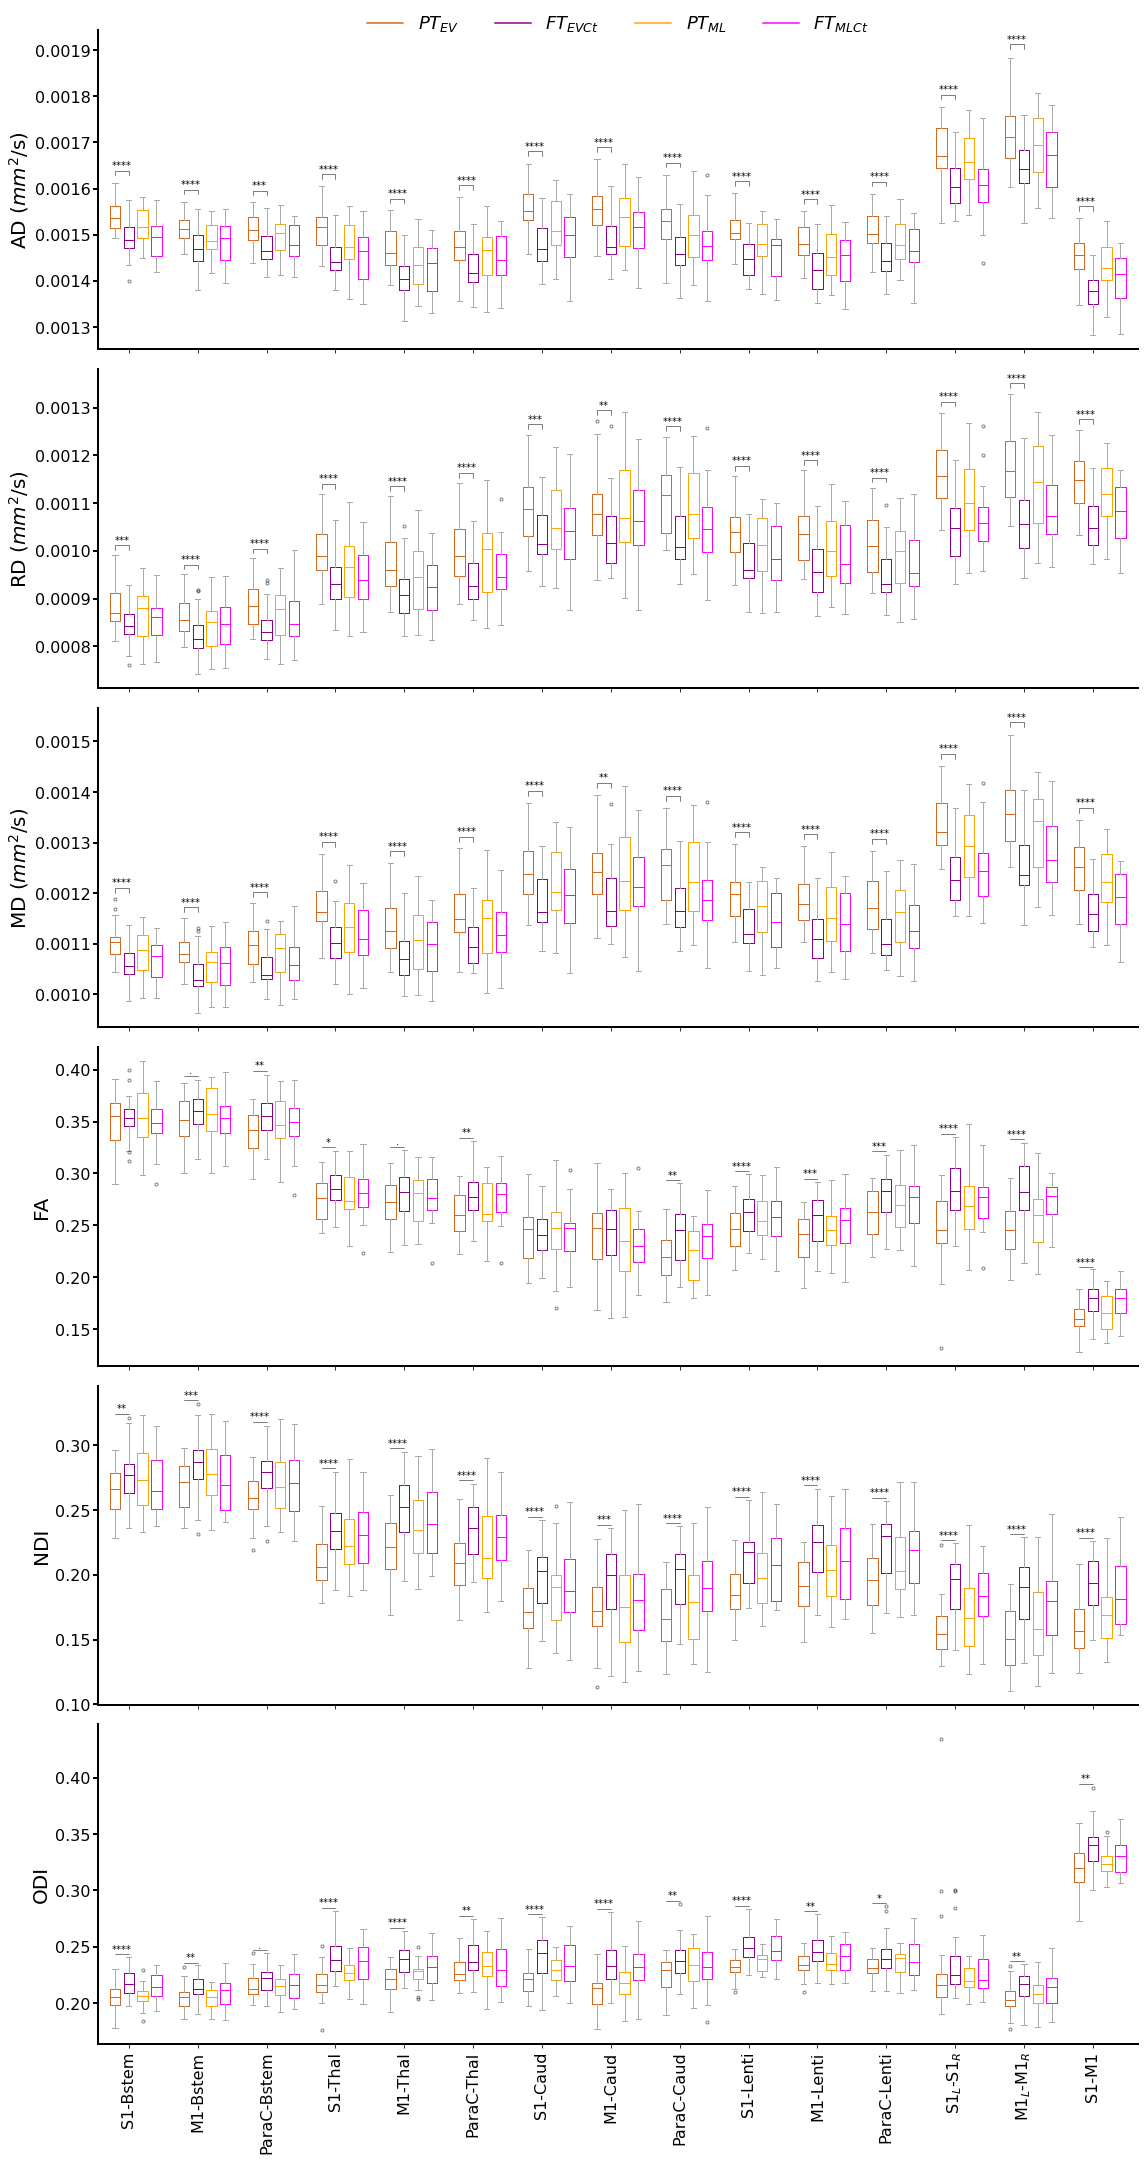

In [5]:
## add subplotting here 
fig, axs = plt.subplots(6,1, figsize=(16,30), sharex=True)
    

for i_met, metric in enumerate(['AD', 'RD', 'MD','FA', 'NDI', 'ODI']):
    
    metric_subset = [tract + '_' + metric for tract in pair_names]
    names = [ part.split('-')[1]+'-'+part.split('-')[0] for part in pair_names]
    
    
    extreme = preterms[preterms['subject_id'].isin(extreme_and_match['preterm_ID'].values)][metric_subset]
    moderate = preterms[preterms['subject_id'].isin(moderate_and_match['preterm_ID'].values)][metric_subset]
    extreme_control = controls[controls['subject_id'].isin(extreme_and_match['matched_ID'].values)][metric_subset]
    moderate_control = controls[controls['subject_id'].isin(moderate_and_match['matched_ID'].values)][metric_subset]
    
    
    ## add subplotting here 
    #plt.figure(figsize=(16,6))
    
    bp_ex = axs[i_met].boxplot(extreme.values, positions=np.array(range(len(names)))*2.0-0.6, sym='.', 
            widths=0.3, vert=True, labels=tract_names, showfliers=True)
    
    bp_ex_ct = axs[i_met].boxplot(extreme_control.values, positions=np.array(range(len(names)))*2.0-0.2, sym='.', 
                  widths=0.3, vert=True, labels=tract_names, showfliers=True)
    
    bp_mod = axs[i_met].boxplot(moderate.values, positions=np.array(range(len(names)))*2.0+0.2, sym='.', 
                  widths=0.3, vert=True, labels=tract_names, showfliers=True)
    
    
    bp_mod_ct = axs[i_met].boxplot(moderate_control.values, positions=np.array(range(len(names)))*2.0+0.6, sym='.', 
                  widths=0.3, vert=True, labels=tract_names, showfliers=True)
    
    
    ### set color code 
    set_box_color(bp_ex, 'chocolate') # colors are from http://colorbrewer2.org
    set_box_color(bp_mod, 'orange')
    set_box_color(bp_ex_ct, 'darkmagenta')
    set_box_color(bp_mod_ct, 'magenta')
    
    met_for_plots = np.array(metric_subset)
    
    ### plot significance 
    notation = get_notation(sig_results = res_comp, pair_names=pair_names,metric =metric)
    for i, txt in enumerate(notation):
        if txt != ' ':
            x1,x2 = (np.array(range(len(names)))*2.0-0.6)[i], (np.array(range(len(names)))*2.0-0.2)[i]
            
            if extreme[met_for_plots[i]].max() > extreme_control[met_for_plots[i]].max():
                y, h, col = extreme[met_for_plots[i]].max() * 1.01 , 0.00001, 'k'
            else: 
                y, h, col = extreme_control[met_for_plots[i]].max() * 1.01, 0.00001, 'k'
                
            axs[i_met].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
            axs[i_met].text((x1+x2)*.5, y+h, txt, ha='center', va='bottom', color=col)
            
    ### ticks 
    #ticks = np.array(range(len(names)))*2.0-0.2
    #axs[i_met].set_xticks(ticks)
    #axs[i_met].set_xticklabels( names, rotation=90, fontsize=16)
    
    ### ticks 
    ticks = np.array(range(len(pair_names_adjusted)))*2.0-0.2
    axs[i_met].set_xticks(ticks)
    axs[i_met].set_xticklabels( pair_names_adjusted, rotation=90, fontsize=16)
    
    #axs[i_met].title.set_text('{}: Univariate bundle-wise group comparison'.format(metric))
    #axs[i_met].set_title('{}: Univariate bundle-wise group comparison'.format(metric), fontsize=20)
    
    if metric in ['AD', 'RD', 'MD']:
        
        axs[i_met].set_ylabel('{} ({})'.format(metric, '$mm^2$/s' ), fontsize=20)
    else: 
        axs[i_met].set_ylabel('{}'.format(metric ), fontsize=20)
        
        
    # Hide the right and top spines
    axs[i_met].spines['right'].set_visible(False)
    axs[i_met].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        axs[i_met].spines[axis].set_linewidth(2)
        
    axs[i_met].tick_params(axis='y', labelsize=16)    
    plt.setp(axs[i_met].yaxis.get_ticklines(), 'markeredgewidth', 2)
    plt.setp(axs[i_met].yaxis.get_ticklines(), 'markersize', 5)

### legend 
# draw temporary red and blue lines and use them to create a legend\n",
axs[0].plot([], c='chocolate', label='$PT_{EV}$')
axs[0].plot([], c='darkmagenta', label='$FT_{EVCt}$')
axs[0].plot([], c='orange', label='$PT_{ML}$')
axs[0].plot([], c='magenta', label='$FT_{MLCt}$')
    
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), 
           ncol = 4, fontsize=18, frameon=False, markerscale=0.6)    


fig.patch.set_facecolor('white')

#plt.subplots_adjust(hspace = 0.18)
plt.tight_layout()

plt.savefig('../../Results/figures/Univariate_difusion_group_analysis_lowres_reordered.png', dpi=300 )
plt.show()

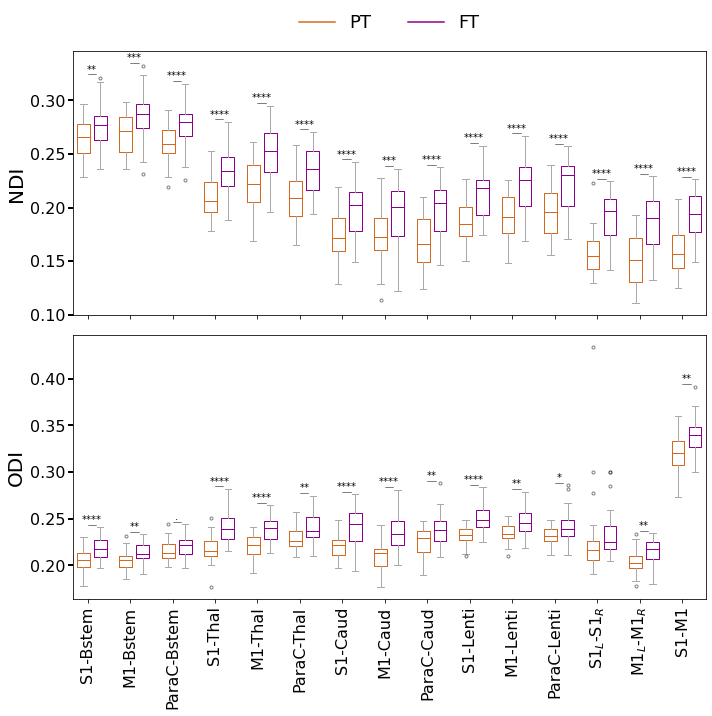

In [14]:
## add subplotting here 
fig, axs = plt.subplots(2,1, figsize=(10,10), sharex=True)
    

for i_met, metric in enumerate(['NDI', 'ODI']):
    
    metric_subset = [tract + '_' + metric for tract in pair_names]
    names = [ part.split('-')[1]+'-'+part.split('-')[0] for part in pair_names]
    
    
    extreme = preterms[preterms['subject_id'].isin(extreme_and_match['preterm_ID'].values)][metric_subset]
    extreme_control = controls[controls['subject_id'].isin(extreme_and_match['matched_ID'].values)][metric_subset]
 
    ## add subplotting here 
    #plt.figure(figsize=(16,6))
    
    bp_ex = axs[i_met].boxplot(extreme.values, positions=np.array(range(len(names)))*2.0-0.4, sym='.', 
            widths=0.6, vert=True, labels=tract_names, showfliers=True)
    
    bp_ex_ct = axs[i_met].boxplot(extreme_control.values, positions=np.array(range(len(names)))*2.0+0.4, sym='.', 
                  widths=0.6, vert=True, labels=tract_names, showfliers=True)

    
    ### set color code 
    set_box_color(bp_ex, 'chocolate') # colors are from http://colorbrewer2.org
    set_box_color(bp_ex_ct, 'darkmagenta')

    
    met_for_plots = np.array(metric_subset)
    
    ### plot significance 
    notation = get_notation(sig_results = res_comp, pair_names=pair_names,metric =metric)
    for i, txt in enumerate(notation):
        if txt != ' ':
            x1,x2 = (np.array(range(len(names)))*2.0-0.2)[i], (np.array(range(len(names)))*2.0+0.2)[i]
            
            if extreme[met_for_plots[i]].max() > extreme_control[met_for_plots[i]].max():
                y, h, col = extreme[met_for_plots[i]].max() * 1.01 , 0.00001, 'k'
            else: 
                y, h, col = extreme_control[met_for_plots[i]].max() * 1.01, 0.00001, 'k'
                
            axs[i_met].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=0.5, c=col)
            axs[i_met].text((x1+x2)*.5, y+h, txt, ha='center', va='bottom', color=col)
            
    ### ticks 
    #ticks = np.array(range(len(names)))*2.0-0.2
    #axs[i_met].set_xticks(ticks)
    #axs[i_met].set_xticklabels( names, rotation=90, fontsize=16)
    
    ### ticks 
    ticks = np.array(range(len(pair_names_adjusted)))*2.0-0.2
    axs[i_met].set_xticks(ticks)
    axs[i_met].set_xticklabels( pair_names_adjusted, rotation=90, fontsize=16)
    
    #axs[i_met].title.set_text('{}: Univariate bundle-wise group comparison'.format(metric))
    #axs[i_met].set_title('{}: Univariate bundle-wise group comparison'.format(metric), fontsize=20)
    
    if metric in ['AD', 'RD', 'MD']:
        
        axs[i_met].set_ylabel('{} ({})'.format(metric, '$mm^2$/s' ), fontsize=20)
    else: 
        axs[i_met].set_ylabel('{}'.format(metric ), fontsize=20)
        
        
    # Hide the right and top spines
    #axs[i_met].spines['right'].set_visible(False)
    #axs[i_met].spines['top'].set_visible(False)
    #for axis in ['bottom','left']:
    #    axs[i_met].spines[axis].set_linewidth(2)
        
    axs[i_met].tick_params(axis='y', labelsize=16)    
    plt.setp(axs[i_met].yaxis.get_ticklines(), 'markeredgewidth', 2)
    plt.setp(axs[i_met].yaxis.get_ticklines(), 'markersize', 5)

### legend 
# draw temporary red and blue lines and use them to create a legend\n",
axs[0].plot([], c='chocolate', label='PT')
axs[0].plot([], c='darkmagenta', label='FT')

axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.2), 
           ncol = 4, fontsize=18, frameon=False, markerscale=0.6)    


fig.patch.set_facecolor('white')

#plt.subplots_adjust(hspace = 0.18)
plt.tight_layout()

plt.savefig('../../Results/figures/Univariate_analysis_NODDI_extreme.png', dpi=300 )
plt.show()

### try to plot relative change

In [8]:
# extreme, moderate, extreme_control, moderate_control

In [15]:
df_diff_extreme = pd.DataFrame(columns=preterms.columns[2:])
df_diff_moderate = pd.DataFrame(columns=preterms.columns[2:])

bundles = preterms.columns[2:]

extreme = preterms[preterms['subject_id'].isin(extreme_and_match['preterm_ID'].values)][bundles]
moderate = preterms[preterms['subject_id'].isin(moderate_and_match['preterm_ID'].values)][bundles]
extreme_control = controls[controls['subject_id'].isin(extreme_and_match['matched_ID'].values)][bundles]
moderate_control = controls[controls['subject_id'].isin(moderate_and_match['matched_ID'].values)][bundles]


for bundle in bundles:
    df_diff_extreme[bundle] = (extreme[bundle].values - extreme_control[bundle].values) * 100 /extreme_control[bundle].values
    df_diff_moderate[bundle] = (moderate[bundle].values - moderate_control[bundle].values) * 100 /moderate_control[bundle].values
    
    

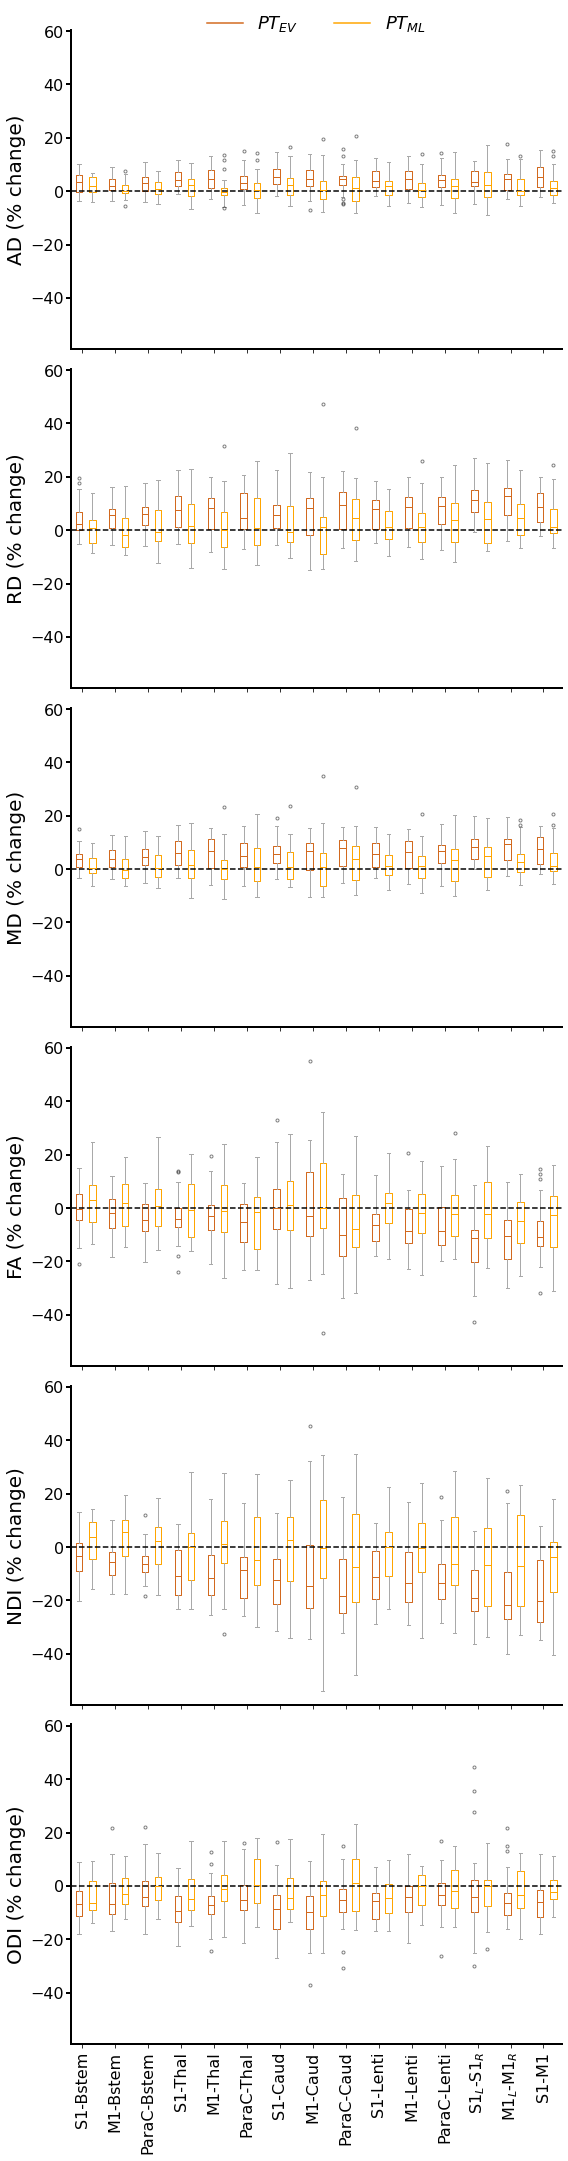

In [16]:
## add subplotting here 
fig, axs = plt.subplots(6,1, figsize=(8,30), sharex=True, sharey=True)
    

for i_met, metric in enumerate(['AD', 'RD', 'MD','FA', 'NDI','ODI']):
    
    metric_subset = [tract + '_' + metric for tract in pair_names]
    names = [ part.split('-')[1]+'-'+part.split('-')[0] for part in pair_names]
    
    
    extreme = df_diff_extreme[metric_subset]
    moderate = df_diff_moderate[metric_subset]
    
    ## add subplotting here 
    #plt.figure(figsize=(16,6))
    

    bp_ex = axs[i_met].boxplot(extreme.values, positions=np.array(range(len(names)))*2.0-0.4, sym='.', 
                  widths=0.4, vert=True, labels=tract_names, showfliers=True)
    
    bp_mod = axs[i_met].boxplot(moderate.values, positions=np.array(range(len(names)))*2.0+0.4, sym='.', 
                  widths=0.4, vert=True, labels=tract_names, showfliers=True)
    
    
    ### set color code 
    set_box_color(bp_ex, 'chocolate') # colors are from http://colorbrewer2.org
    set_box_color(bp_mod, 'orange')
    #set_box_color(bp_ex_ct, 'forestgreen')
    #set_box_color(bp_mod_ct, 'lightgreen')
    
    met_for_plots = np.array(metric_subset)
    
    
    ### ticks 
    ticks = np.array(range(len(names)))*2.0-0.2
    axs[i_met].set_xticks(ticks)
    #axs[i_met].set_xticklabels( names, rotation=90, fontsize=16)
    axs[i_met].set_xticklabels( pair_names_adjusted, rotation=90, fontsize=16)
    
    #axs[i_met].title.set_text('{}: Univariate bundle-wise group comparison'.format(metric))
    #axs[i_met].set_title('{}: Univariate % change from control'.format(metric), fontsize=20)
    
    #if metric in ['AD', 'RD', 'MD']:
        
    #    axs[i_met].set_ylabel('{} ({})'.format(metric, '$mm^2$/s' ), fontsize=20)
    #else: 
    axs[i_met].set_ylabel('{} (% change)'.format(metric ), fontsize=20)
        
    # make baseline 
    axs[i_met].axhline(y=0,xmin=0,xmax=len(names)*2, c='black', linestyle='--')
        
    # Hide the right and top spines
    axs[i_met].spines['right'].set_visible(False)
    axs[i_met].spines['top'].set_visible(False)
    for axis in ['bottom','left']:
        axs[i_met].spines[axis].set_linewidth(2)
        
    axs[i_met].tick_params(axis='y', labelsize=16)    
    plt.setp(axs[i_met].yaxis.get_ticklines(), 'markeredgewidth', 2)
    plt.setp(axs[i_met].yaxis.get_ticklines(), 'markersize', 5)

### legend 
# draw temporary red and blue lines and use them to create a legend\n",
axs[0].plot([], c='chocolate', label='$PT_{EV}$')
#axs[0].plot([], c='forestgreen', label='Extreme control')
axs[0].plot([], c='orange', label='$PT_{ML}$')
#axs[0].plot([], c='lightgreen', label='Moderate control')
    
axs[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), 
           ncol = 2, fontsize=18, frameon=False, markerscale=0.6)    


fig.patch.set_facecolor('white')

#plt.subplots_adjust(hspace = 0.18)
plt.tight_layout()

plt.savefig('../../Results/figures/Univariate_group_analyses_relative_change_lowres_reordered.png', dpi=300 )
plt.show()